In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectKBest, f_classif
import pylab
import scipy
import sklearn
import time
import seaborn as sns
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [3]:
pd.set_option("display.max_rows", 250000)

In [4]:
df = pd.read_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/GSE59114.csv', header = 1)
df1 = df.T
df1.columns = df1.loc['Gene Symbol'].reset_index()
df1 = df1.drop(['Gene Symbol', 'UCSC transcripts'])
df1.columns = [x[1] for x in df1.columns]
df1.columns = df1.columns.str.replace("'", "")
df1.shape

(1434, 8422)

Itgam, Ly6g, Ptprc, Cd3e, Ly76, Kit, Ly6a, Cd48, Slamf1

In [5]:
import re
df1_1 = df1[~df1.index.str.contains('biol_replicate')]
df1_1 = df1_1.drop(['\'Young LT-HSC\'','\'Young ST-HSC\'', '\'Young MPP\'','\'Old LT-HSC\'', '\'Old ST-HSC\'','Old MPP\''])
df1_1 = df1_1.drop(['Itgam', 'Ptprc', 'Kit', 'Ly6a', 'Cd48', 'Slamf1'], axis = 1)

In [6]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, young_LT_HSC_2 to old_MPP_168
Columns: 8416 entries, Npl to Sft2d1
dtypes: object(8416)
memory usage: 67.9+ MB


In [7]:
df1_1.index = df1_1.index.str.replace(r'[^a-zA-Z]', '')

print((df1_1.columns).shape)
print(np.unique(df1_1.columns).shape)

(8416,)
(8351,)


In [8]:
df1_1dup = df1_1[df1_1.loc[:,df1_1.columns.duplicated()].columns]


In [9]:
dupcols = np.unique(df1_1dup.columns)
dupcols

array(['Abcg2', 'Arih1', 'Atf7ip', 'Atrip', 'Brwd1', 'Cbx1', 'Ccnd3',
       'Cdk6', 'Celf1', 'Commd1', 'Csnk1a1', 'Ctse', 'Dnajb6', 'Eci2',
       'Eif1ax', 'Fgd4', 'Fus', 'G3bp1', 'Glod4', 'Gm10598', 'Gm13215',
       'Hjurp', 'Ikbkb', 'Ing4', 'Itga4', 'Itga6', 'Kansl2', 'Lcor',
       'Lrrc29', 'Luc7l2', 'Mafg', 'Mecom', 'Mob1a', 'Mtcp1', 'Nagk',
       'Ndufa3', 'Pafah1b1', 'Patz1', 'Pcif1', 'Pik3ip1', 'Psme4', 'Pten',
       'Ramp2', 'Rpl24', 'Rspry1', 'Satb1', 'Smarcc2', 'Srcap', 'Srsf10',
       'Sugp2', 'Taf9', 'Tex261', 'Tmem167b', 'Tmem181b-ps', 'Trappc9',
       'Trim30b', 'U2af1l4', 'Utp23', 'Wwp2', 'Zbtb20', 'Zfp708',
       'Zfp869', 'Zgpat'], dtype=object)

In [10]:
df1_1dupgroup = df1_1dup.groupby(df1_1dup.columns, axis=1).sum()

In [11]:
df1_1dupmean = pd.DataFrame()
for x in dupcols:
    df1_1dupmean[x] = df1_1dupgroup[x]/df1_1dup.columns.tolist().count(x)


In [12]:
# cols = []
# n = 1
# for x in df2dup.columns:
#     if x in cols:
#         cols.append(x+'.'+str(n))
#         n += 1
#     else:
#         cols.append(x)
#         n = 1


In [13]:
dfnodup = df1_1.loc[:,~df1_1.columns.duplicated()].drop(dupcols, axis = 1)

df2 = pd.concat([dfnodup, df1_1dupmean], axis = 1)

df2= df2.round(2)
df2.shape

(1058, 8351)

In [14]:
genefracs = (df2==0).sum()/(df2==0).count()
passindex = genefracs[genefracs < 0.40]


In [15]:
zifa = df2[passindex.index]
zifa= np.round(zifa.astype(np.float64),4)
zifa = np.array(zifa)
zifa.shape

(1058, 2114)

In [16]:
from ZIFA import ZIFA
from ZIFA import block_ZIFA

In [17]:
start_time = time.time()
Z, model_params = block_ZIFA.fitModel(zifa, 20)
print("--- %s seconds ---" % (time.time() - start_time))

Filtering out all genes which are zero in more than 95.0% of samples. To change this, change p0_thresh.
Number of blocks has been set to 4
Running block zero-inflated factor analysis with N = 1058, D = 2114, K = 20, n_blocks = 4
Block sizes [528, 528, 528, 530]
Param change below threshold 1.000e-02 after 14 iterations
--- 376.9671790599823 seconds ---


In [18]:
dfz = pd.DataFrame(Z, index = df2.index)
dfz

0         1         2         3         4         5  \
youngLTHSC -0.532278  0.219599 -0.070336  1.095052  0.673868  1.624663   
youngLTHSC -1.061361  1.074353 -0.035902 -0.344406  1.035603  1.547911   
youngLTHSC -1.581717 -0.749602  0.383338 -0.302505  1.135204  1.826177   
youngLTHSC -0.162635 -0.674535  0.219934 -1.557568  2.853536  1.762441   
youngLTHSC  0.363704 -0.399954 -0.823222  0.376017  1.595725  3.495471   
youngLTHSC -0.370953 -0.738485 -0.586451 -0.870621  0.646204  1.718775   
youngLTHSC -1.413721  0.127956  0.503260 -0.116148  1.251545  0.365920   
youngLTHSC -1.369653 -0.361033 -0.248559 -1.091442 -0.129870  0.375759   
youngLTHSC  0.089898  1.062384 -0.519908 -1.765386  0.390688  0.528617   
youngLTHSC  0.182789 -1.206251 -0.437528 -2.913608 -0.353036  1.574386   
youngLTHSC  2.248223 -0.359130 -0.779636 -2.688561  2.261604  1.990831   
youngLTHSC -0.486298  0.417852 -0.258610 -2.864571  0.122470  0.464779   
youngLTHSC  0.694740  2.313596  0.209007 -0.848660  0.658862 -0.260039   
youngLTHSC -1.902124  0.067750  0.179595 -1.924260  1.342825  0.581268   
youngLTHSC -0.664144  0.468254 -0.406384 -0.298555  0.644055 -0.056932   
youngLTHSC  2.367084 -0.526948 -1.319913 -1.122092 -0.635890  1.054227   
youngLTHSC  0.474689  1.497965 -0.763467 -0.180467  0.994413  0.139451   
youngLTHSC  1.316572  1.410411 -0.357750 -0.049592  0.969781 -1.907196   
youngLTHSC -1.229652  0.795894  0.102510 -1.957056  1.332110  0.094868   
youngLTHSC -0.490173  0.449414  0.348941 -0.990755  2.668342  0.443921   
youngLTHSC  1.179578 -0.216583 -1.377641 -0.076785  0.134866  0.435118   
youngLTHSC -0.006618 -0.330029 -0.677174 -1.969723  0.245338  0.026185   
youngLTHSC  0.182604  1.009058 -0.642283 -3.432703  1.325725  1.723597   
youngLTHSC  0.357372 -1.848928 -0.487429 -2.593316  0.591332 -0.975793   
youngLTHSC  0.170301 -1.094611 -0.528331 -1.153276 -0.569638  0.852049   
youngLTHSC  0.697519  0.589549 -1.483925  0.142414 -0.619789  0.557068   
youngLTHSC  0.421175 -1.279762 -0.902215 -0.872296 -0.795465  1.095524   
youngLTHSC  0.780696 -1.028393 -1.347796 -0.801915 -0.964980  1.655304   
youngLTHSC -0.151923 -0.862948 -0.351860  0.105761 -0.048711  0.502729   
youngLTHSC -1.365083  0.724592  0.206735 -1.748400  0.741484  0.761708   
youngLTHSC  1.481324 -0.352156 -0.975153 -3.735719  1.608598  0.498854   
youngLTHSC  1.242310  0.694190 -0.354518 -2.984218  2.329540 -1.571770   
youngLTHSC  0.755258  0.049108 -1.056424 -1.662762 -0.888150 -0.867941   
youngLTHSC -0.630606  1.982488 -0.498969 -2.137828  1.170757 -0.082655   
youngLTHSC -0.929671 -1.741499 -0.063646 -1.762499  0.408101  1.005595   
youngLTHSC -0.157070 -0.037705 -0.704748 -1.128254  0.063221 -0.265804   
youngLTHSC -0.613176  1.308055 -0.104772 -0.823883  1.970907 -0.557419   
youngLTHSC  0.494288 -1.252628 -0.701926 -2.254831  0.345365  0.374861   
youngLTHSC  2.344998  1.545119 -1.283147 -0.219636  1.221795 -1.514669   
youngLTHSC  0.969673  1.894927 -1.185366 -0.105416  0.581474 -0.775662   
youngLTHSC -0.758515  0.199331 -0.252675 -2.335267  0.288077  0.801128   
youngLTHSC  1.722545  2.823645 -1.425288 -1.450325  1.639794  1.024950   
youngLTHSC -0.573083  2.313899  0.047411 -1.017491  2.532451  0.314543   
youngLTHSC  1.063691  1.464488 -0.812914 -1.888230  1.391675 -0.337164   
youngLTHSC -0.455422  0.676299 -0.158328 -1.501856  2.743040  0.214414   
youngLTHSC -0.186510  0.571907 -0.087125 -0.650330  0.752867  0.559770   
youngLTHSC  0.431220  0.468139 -0.755666 -0.859483  0.114105  0.031209   
youngLTHSC  0.200268 -0.076849 -0.737930 -0.732375  0.454846  0.334929   
youngLTHSC  0.286636  0.402806 -0.353079 -1.718101  0.404777 -0.358008   
youngLTHSC  1.151787  0.839171 -0.859907 -0.825172 -0.116109 -1.322280   
youngLTHSC -1.274354 -1.593567 -0.235129 -1.023797 -0.611996 -0.051560   
youngLTHSC  0.289186  1.828355 -0.371493 -1.918761  1.814762 -0.530321   
youngLTHSC  0.752029  2.284264 -0.323756 -1.022198  2.609523 -0.308162   
youngLTHSC  2.720619  2

In [19]:
dfz.describe()

0            1            2            3            4   \
count  1058.000000  1058.000000  1058.000000  1058.000000  1058.000000   
mean      0.001787    -0.074225    -0.004517     0.005030     0.001662   
std       1.039283     1.203764     1.189699     1.079070     1.007817   
min      -2.506721    -3.015607    -2.215661    -3.987139    -2.932197   
25%      -0.716847    -0.987247    -0.909916    -0.638425    -0.679612   
50%      -0.136141    -0.059022    -0.300249     0.014330    -0.001463   
75%       0.604200     0.775393     1.018903     0.714211     0.598791   
max       3.896540     3.742293     3.576893     4.493661     4.765976   

                5            6            7            8            9   \
count  1058.000000  1058.000000  1058.000000  1058.000000  1058.000000   
mean      0.001470     0.000850     0.000674     0.002632    -0.002902   
std       0.946543     0.888897     0.836201     0.817014     0.716909   
min      -3.142667    -2.388633    -2.450807    -2.809683    -2.698208   
25%      -0.618152    -0.612899    -0.554323    -0.550533    -0.460207   
50%      -0.007554    -0.064894    -0.044174     0.016461     0.007787   
75%       0.568779     0.514237     0.545720     0.539360     0.463535   
max       3.521061     6.402071     4.138612     2.898145     2.673351   

                10           11           12           13           14  \
count  1058.000000  1058.000000  1058.000000  1058.000000  1058.000000   
mean      0.000326     0.000593     0.002315    -0.001311    -0.001950   
std       0.702256     0.672345     0.602441     0.646937     0.559775   
min      -2.132401    -2.154185    -2.627429    -2.001708    -2.075480   
25%      -0.493030    -0.461830    -0.382623    -0.406730    -0.358383   
50%      -0.034143    -0.029051    -0.031860     0.002148    -0.026546   
75%       0.431416     0.450085     0.410415     0.404083     0.335877   
max       2.395361     2.500658     2.148664     2.766923     2.157540   

                15           16           17           18           19  
count  1058.000000  1058.000000  1058.000000  1058.000000  1058.000000  
mean     -0.001130     0.002682    -0.000501     0.000460     0.002747  
std       0.593391     0.560004     0.540633     0.541329     0.507646  
min      -2.584055    -2.081194    -2.020901    -1.679226    -1.753316  
25%      -0.384937    -0.366742    -0.357755    -0.359739    -0.318837  
50%      -0.012979     0.000350    -0.005750     0.003535     0.025211  
75%       0.356391     0.361332     0.334375     0.338865     0.317360  
max       2.142786     2.227307     1.893483     1.952927     1.448949

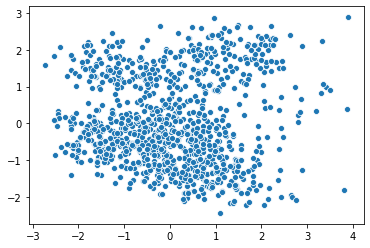

In [50]:
pcaz = PCA(n_components=3, random_state = 42)

zcomps = pcaz.fit_transform(dfz)
sns.scatterplot(zcomps[:,0], zcomps[:,1])
plt.show()

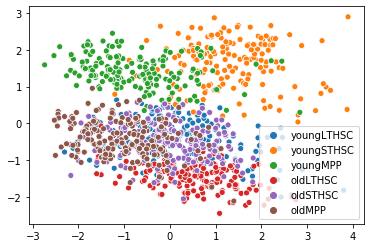

In [51]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = dfz.index)
plt.show()

In [52]:
encoded = {'oldLTHSC':0, 'oldMPP':1, 'oldSTHSC':2, 'youngLTHSC':3, 'youngMPP':4, 'youngSTHSC':5}
cells = ['oldLTHSC' ,'oldMPP', 'oldSTHSC', 'youngLTHSC' ,'youngMPP' ,'youngSTHSC']
cell_types = [encoded.get(x, x) for x in dfz.index]
colormap = ['r', 'b', 'g', 'y', 'c', 'm']
cell_colors = [colormap[x] for x in cell_types]
dfpca = pd.DataFrame(zcomps, index = dfz.index)
dfpca
fig = px.scatter_3d(dfpca, zcomps[:,0], zcomps[:,1],zcomps[:,2], dfpca.index)
fig.update_traces(marker=dict(opacity =1, size=3,
                              line=dict(width= .1)))

fig.show()

In [24]:
np.cov(dfz)

array([[ 0.54321362,  0.23069668,  0.41791519, ...,  0.00355407,
        -0.01927524, -0.033678  ],
       [ 0.23069668,  0.77814329,  0.47520407, ..., -0.18648481,
        -0.03446208, -0.29490212],
       [ 0.41791519,  0.47520407,  0.91623453, ..., -0.19682641,
         0.00504676, -0.2043611 ],
       ...,
       [ 0.00355407, -0.18648481, -0.19682641, ...,  0.3955812 ,
         0.17685834,  0.29396658],
       [-0.01927524, -0.03446208,  0.00504676, ...,  0.17685834,
         0.36837594,  0.16486097],
       [-0.033678  , -0.29490212, -0.2043611 , ...,  0.29396658,
         0.16486097,  0.55201775]])

Text(0.5, 1.0, 'ZIFA-UMAP (20 dim): genes with fewer than 40% zeros')

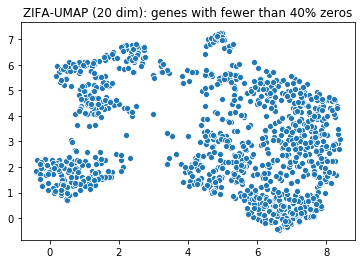

In [65]:
zumap = umap.UMAP(n_neighbors=20,
                      min_dist=.2,
                      metric='euclidean').fit_transform(dfz)
fig = sns.scatterplot(zumap[:,0], zumap[:,1])
fig.set_title('ZIFA-UMAP (20 dim): genes with fewer than 40% zeros')
#fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

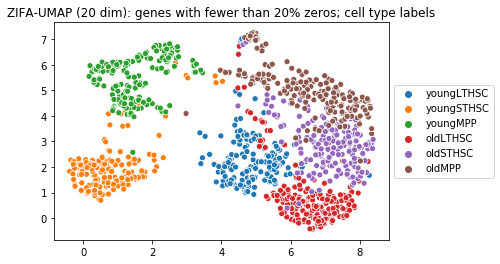

In [66]:
fig = sns.scatterplot(zumap[:,0], zumap[:,1], hue = dfz.index)
fig.set_title('ZIFA-UMAP (20 dim): genes with fewer than 40% zeros; cell type labels')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [40]:
gmm = GaussianMixture(n_components = 6)
gmm.fit(dfz)
cluster = gmm.fit_predict(dfz)


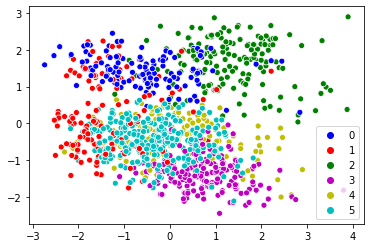

In [55]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = cluster,palette =['b', 'r', 'g', 'm', 'y', 'c'])

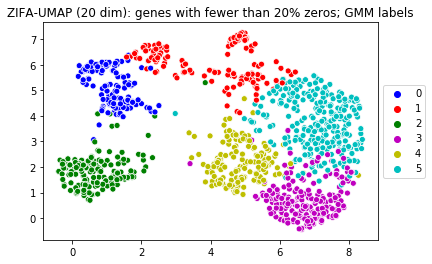

In [67]:
fig = sns.scatterplot(zumap[:,0], zumap[:,1], hue = cluster, palette =['b', 'r', 'g', 'm', 'y', 'c'])
fig.set_title('ZIFA-UMAP (20 dim): genes with fewer than 40% zeros; GMM labels')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [57]:
km = KMeans(n_clusters = 6, random_state=42)
kmdata = km.fit_transform(dfz)
kpred = km.fit_predict(dfz)

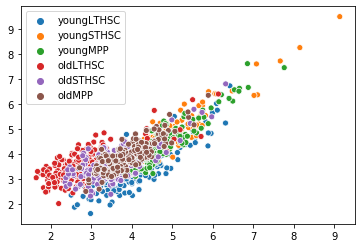

In [58]:
sns.scatterplot(kmdata[:,0], kmdata[:,1], hue = dfz.index)

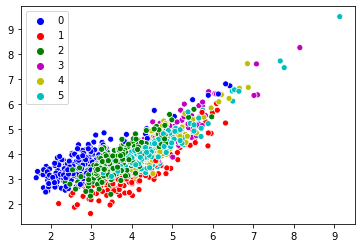

In [60]:
sns.scatterplot(kmdata[:,0], kmdata[:, 1], hue = kpred, palette =['b', 'r', 'g', 'm', 'y', 'c'])

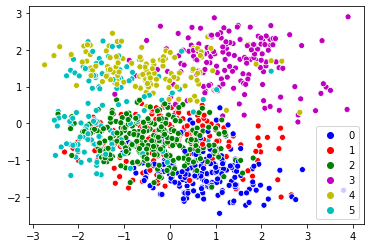

In [61]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = kpred, palette =['b', 'r', 'g', 'm', 'y', 'c'])

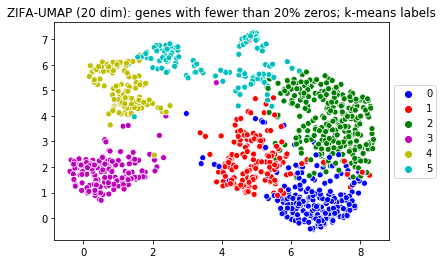

In [68]:
fig = sns.scatterplot(zumap[:,0], zumap[:,1], hue = kpred, palette =['b', 'r', 'g', 'm', 'y', 'c'])
fig.set_title('ZIFA-UMAP (20 dim): genes with fewer than 40% zeros; k-means labels')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

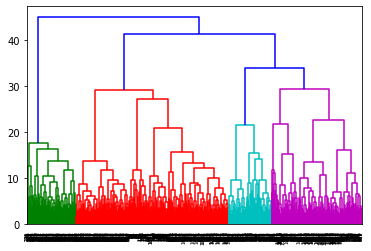

In [48]:
dendrogram(linkage(dfz, method = 'ward'))
plt.show()

In [37]:
dfcelltypes = pd.DataFrame(df2.mean(), columns = ['All cell average'])
dfcelltypes['youngLTHSC'] = df2[df2.index == 'youngLTHSC'].mean()
dfcelltypes['youngSTHSC'] = df2[df2.index == 'youngSTHSC'].mean()
dfcelltypes['youngMPP'] = df2[df2.index == 'youngMPP'].mean()
dfcelltypes['oldLTHSC'] = df2[df2.index == 'oldLTHSC'].mean()
dfcelltypes['oldSTHSC'] = df2[df2.index == 'oldSTHSC'].mean()
dfcelltypes['oldMPP'] = df2[df2.index == 'oldMPP'].mean()


In [ ]:
dfcellbroad = pd.DataFrame(df2.mean(), columns = ['All cell average'])
dfcellbroad['HSC'] = df2[df2.index.str.contains('HSC')].mean()
dfcellbroad['MPP'] = df2[df2.index.str.contains('MPP')].mean()
dfcellbroad['HSC/MPP'] = dfcellbroad['HSC']/dfcellbroad['MPP']
dfcellbroad.sort_values(by = ['HSC/MPP','HSC','MPP'], ascending = False).head(25000)
